# Importing the libraries 

In [47]:
import gymnasium as gym
import matplotlib.pyplot as plt 
import numpy as np
from IPython import *


# Initialising the environment

In [48]:
desc = ["SFFF","FHFH","FFFH","HFFG"]
env = gym.make(id = 'FrozenLake-v1', desc = desc, map_name = "4x4", is_slippery = False, render_mode = "rgb_array")

### Other important Information defined

In [49]:
#Change here and make changes when changing maps - map_name 
Total_environment_rows = 4
Total_environment_cols = 4

### Custom function to render the environment 

In [50]:
def Rendering_State(env):
    image = env.render()
    plt.imshow(image)
    plt.show()
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait = True)

# Initial state of the environment 

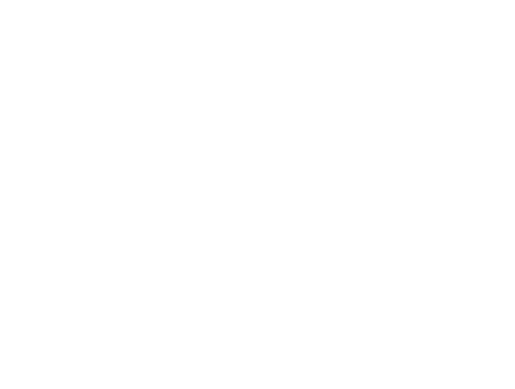

In [51]:
env.reset()
Rendering_State(env)

# Defining the policy

In [52]:
policy_probs = np.full((Total_environment_rows,Total_environment_cols,4),0.25)
print(policy_probs)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]


In [53]:
def policy(cur_pos):
    return policy_probs[cur_pos]

# Testing the policy with State (0,0)

In [54]:
action_probablities = policy((0,0))
for action, prob, in zip(range(4), action_probablities):
    print(f"the probablity of taking action {action} : {prob}")

the probablity of taking action 0 : 0.25
the probablity of taking action 1 : 0.25
the probablity of taking action 2 : 0.25
the probablity of taking action 3 : 0.25


# Defining the value table

In [55]:
state_values = np.zeros((Total_environment_rows,Total_environment_cols))
print(state_values)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# Function for returning pos in row, col

In [56]:
def Pos_Row_col(temp_pos):
    row, col = divmod(temp_pos, 4)
    return (row, col)

# The test agent function

In [57]:
def test_agent(env: gym.Env, policy: callable, episodes: int = 10) -> None:
    for episode in range(episodes):
        temp_pos, prob = env.reset()
        a_row,a_col = Pos_Row_col(temp_pos)
        t_row, t_col = Pos_Row_col((Total_environment_rows * Total_environment_cols)-1)
        done = False

        Rendering_State(env)
        while not done:
            p = policy((a_row, a_col))
            action = np.random.choice(4, p =p)

            info = env.step(action)
            next_state = info[0]
            done = info[2]
            Rendering_State(env)
            
            a_row, a_col = Pos_Row_col(next_state)        

# Simulate Step function 

In [1]:
def simulate_step(env, pos: tuple[int, int], action: int, goal: tuple[int,int]):
    #Getting next state
    if action == 0:
        next_state = (pos[0]-1,pos[1])
    if action == 1:
        next_state = (pos[0],pos[1] + 1)
    if action == 2:
        next_state = (pos[0] + 1,pos[1])
    if action == 3:
        next_state = (pos[0],pos[1] - 1)


    # Getting the reward
    


    done = next_state == goal
    info = {}
    return next_state, reward, done, info



# Implementing the value iteration algorithm

In [ ]:
def value_iteration(policy_probs, state_values, theta = 1e-6, gamma = 0.99):
    delta = float("inf")

    while delta>theta:
        delta = 0

        for row in range(Total_environment_rows):
            for col in range(Total_environment_cols):
                old_value = state_values[(row,col)]
                action_probs = None
                max_qsa = float("-inf")

                for action in range(4):
                    info_temp = simulate_step(env, (row,col), action)
                    

# testing things below here 

In [58]:
test_agent(env, policy)

KeyboardInterrupt: 

In [ ]:
env.step(0)

(0, 0.0, False, False, {'prob': 1.0})